## Marek Ochocki (marcopolo97@vp.pl) i Łukasz Gosek (lukaszjgosek@gmail.com)

# Zadanie 1

Preparing data

In [13]:
import keras
keras.__version__

'2.3.1'

In [14]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Label encoding

In [16]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Calculating class weights

In [17]:
import numpy as np

counts = np.unique(train_labels,return_counts=True)

counts = np.asarray(counts)
# print(counts.shape)

# print(counts)

weights = np.ones(counts.shape[1],dtype=np.float32)

weights = 1/counts[1,:]

w = np.sum(weights)

weights = weights/w

# print(weights)

weightsDict = dict(zip(np.asarray(counts[0,:]),weights))
# print(weightsDict)


Training and validation sets split

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Function for visualization of learning process

In [19]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    plt.figure()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()

    plt.show()

## Experiments

Preparing models: reference model from lecture, model with 1 hidden layer, model with 3 hidden layers, layers with 32 elements, layers with 128 elements, different loss function, tanh activation

In [20]:
from keras import models
from keras import layers

model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(46, activation='softmax'))
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))
model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model4 = models.Sequential()
model4.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(46, activation='softmax'))
model4.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model5 = models.Sequential()
model5.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(128, activation='relu'))
model5.add(layers.Dense(46, activation='softmax'))
model5.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model6 = models.Sequential()
model6.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model6.add(layers.Dense(64, activation='relu'))
model6.add(layers.Dense(46, activation='softmax'))
model6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model7 = models.Sequential()
model7.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model7.add(layers.Dense(64, activation='tanh'))
model7.add(layers.Dense(46, activation='softmax'))
model7.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

models = [model1, model2, model3, model4, model5, model6, model7]

Training models and visualizing training process

Training model 0


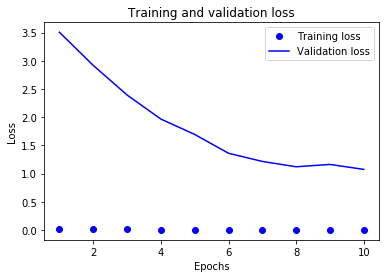

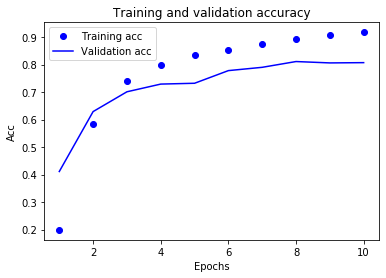

Training model 1


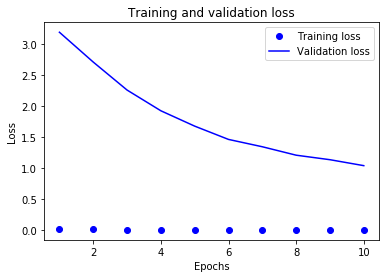

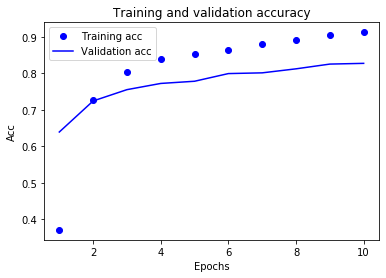

Training model 2


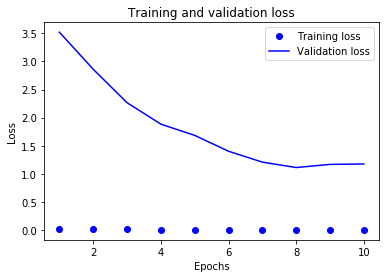

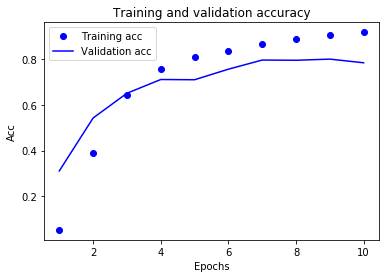

Training model 3


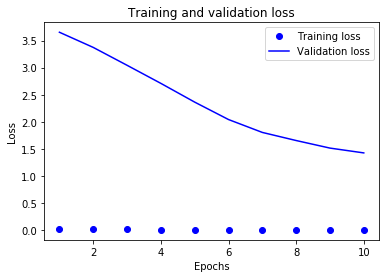

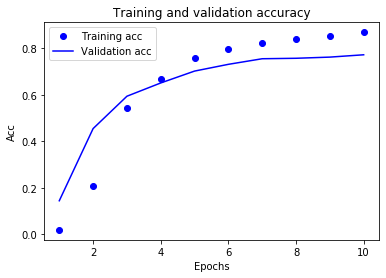

Training model 4


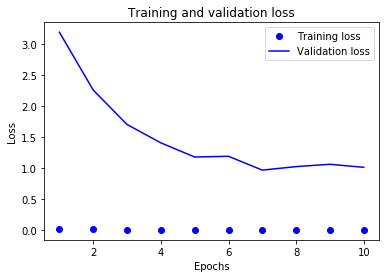

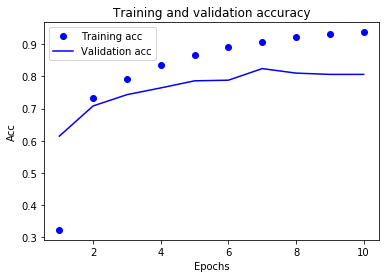

Training model 5


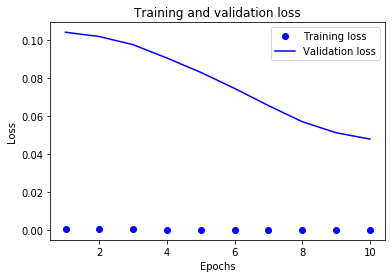

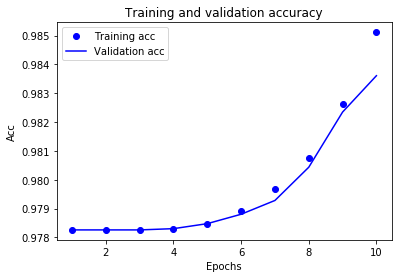

Training model 6


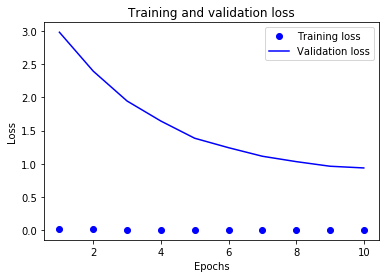

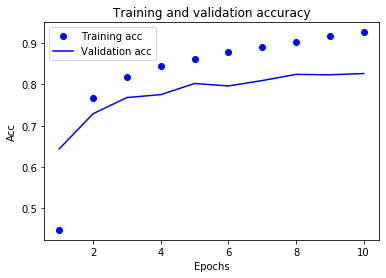

In [21]:
for i, model in enumerate(models):
    print(f"Training model {i}")
    
    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=10,
                        batch_size=512,
                        validation_data=(x_val, y_val),class_weight = weightsDict, verbose=0)
    
    plot_loss_acc(history)

Preparing funciton for model evalutaion od test set: calculates confusion matrix and calssification report

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd

def evaluate_test(model):
    preds = model.predict(x_test)
    predicted_labels = np.argmax(preds, axis=1)
    
#     print(confusion_matrix(test_labels, predicted_labels))
    df_cm = pd.DataFrame(confusion_matrix(test_labels, predicted_labels), index = range(0,46),
                      columns = range(0,46))
    plt.figure(figsize = (20,20))
    sn.heatmap(df_cm, annot=True)
    plt.show()
    print(classification_report(test_labels, predicted_labels))
    print("\n\n")

    


Calculating confusion matrix and classification report for each model

Evaluating model 0


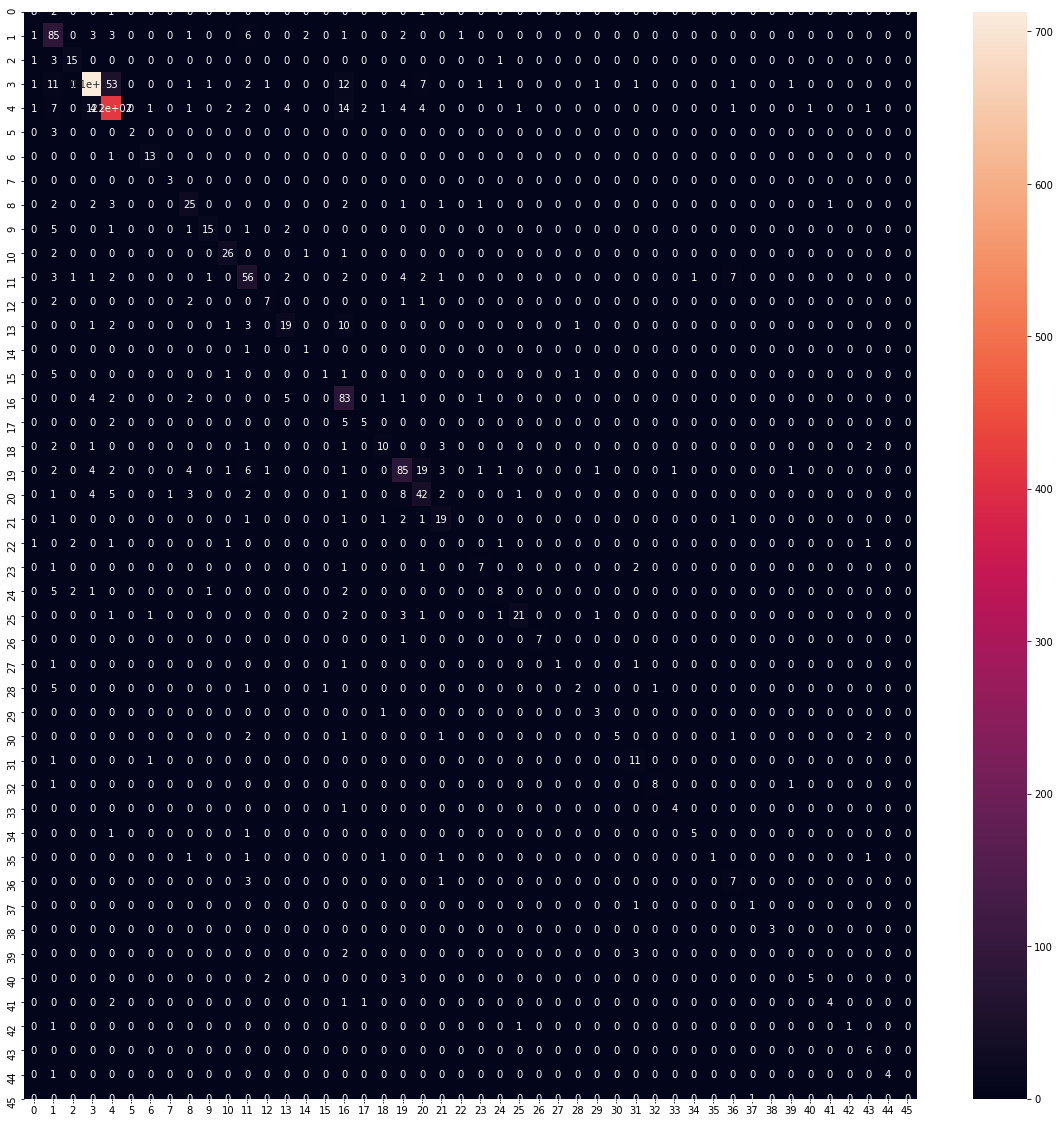

c:\users\luki2\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.56      0.81      0.66       105
           2       0.71      0.75      0.73        20
           3       0.96      0.88      0.91       813
           4       0.84      0.88      0.85       474
           5       1.00      0.40      0.57         5
           6       0.81      0.93      0.87        14
           7       0.75      1.00      0.86         3
           8       0.61      0.66      0.63        38
           9       0.83      0.60      0.70        25
          10       0.81      0.87      0.84        30
          11       0.63      0.67      0.65        83
          12       0.64      0.54      0.58        13
          13       0.59      0.51      0.55        37
          14       0.25      0.50      0.33         2
          15       0.50      0.11      0.18         9
          16       0.57      0.84      0.68        99
          17       0.62    

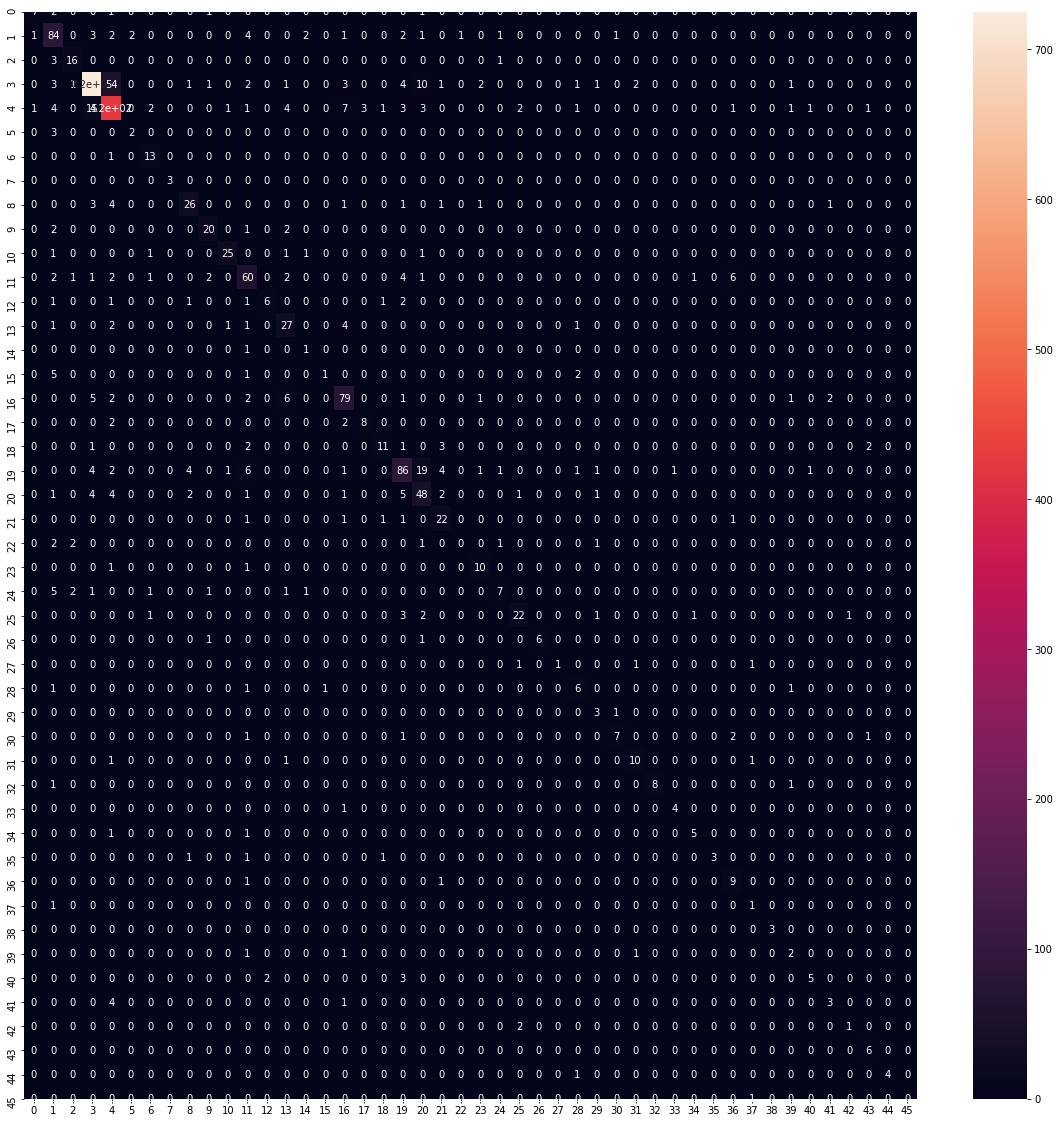

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.69      0.80      0.74       105
           2       0.73      0.80      0.76        20
           3       0.95      0.89      0.92       813
           4       0.83      0.89      0.86       474
           5       0.50      0.40      0.44         5
           6       0.68      0.93      0.79        14
           7       1.00      1.00      1.00         3
           8       0.74      0.68      0.71        38
           9       0.77      0.80      0.78        25
          10       0.89      0.83      0.86        30
          11       0.66      0.72      0.69        83
          12       0.75      0.46      0.57        13
          13       0.60      0.73      0.66        37
          14       0.20      0.50      0.29         2
          15       0.50      0.11      0.18         9
          16       0.77      0.80      0.78        99
          17       0.73    

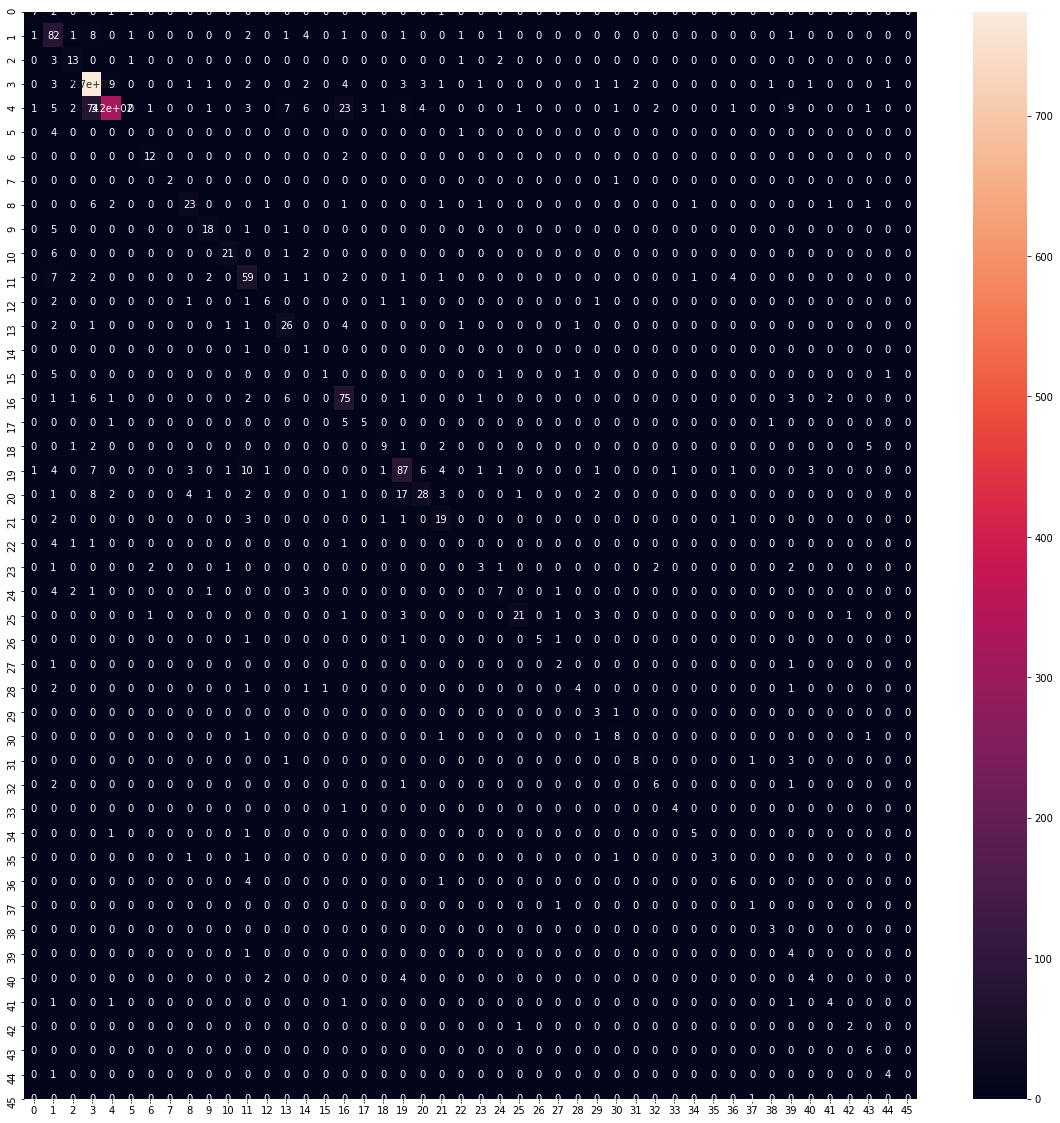

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.55      0.78      0.64       105
           2       0.52      0.65      0.58        20
           3       0.87      0.95      0.91       813
           4       0.95      0.68      0.79       474
           5       0.00      0.00      0.00         5
           6       0.75      0.86      0.80        14
           7       1.00      0.67      0.80         3
           8       0.70      0.61      0.65        38
           9       0.75      0.72      0.73        25
          10       0.88      0.70      0.78        30
          11       0.61      0.71      0.66        83
          12       0.60      0.46      0.52        13
          13       0.59      0.70      0.64        37
          14       0.05      0.50      0.09         2
          15       0.50      0.11      0.18         9
          16       0.61      0.76      0.68        99
          17       0.62    

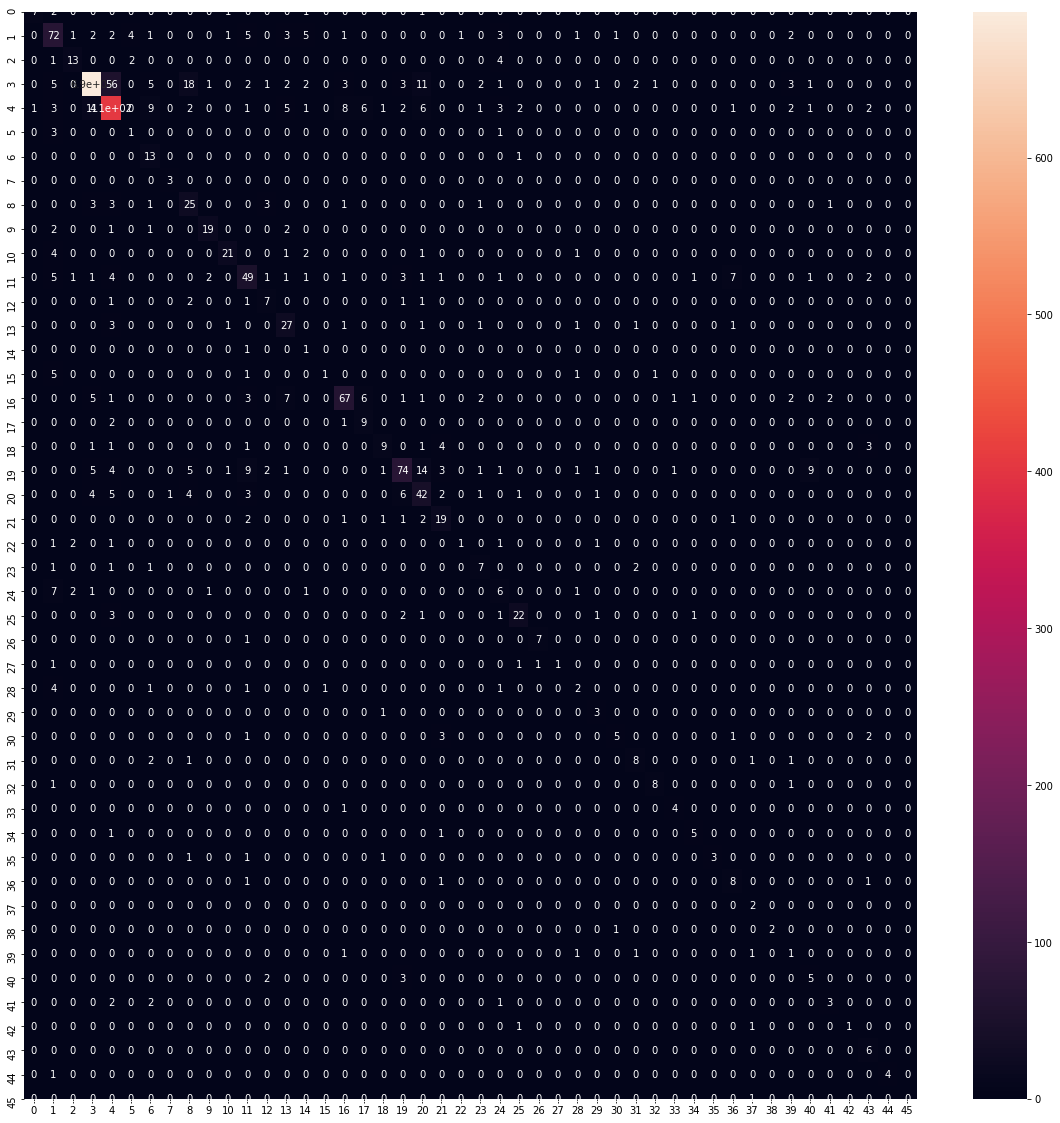

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.61      0.69      0.65       105
           2       0.68      0.65      0.67        20
           3       0.95      0.85      0.90       813
           4       0.82      0.86      0.84       474
           5       0.14      0.20      0.17         5
           6       0.36      0.93      0.52        14
           7       0.75      1.00      0.86         3
           8       0.43      0.66      0.52        38
           9       0.83      0.76      0.79        25
          10       0.84      0.70      0.76        30
          11       0.59      0.59      0.59        83
          12       0.44      0.54      0.48        13
          13       0.55      0.73      0.63        37
          14       0.07      0.50      0.12         2
          15       0.50      0.11      0.18         9
          16       0.78      0.68      0.72        99
          17       0.43    

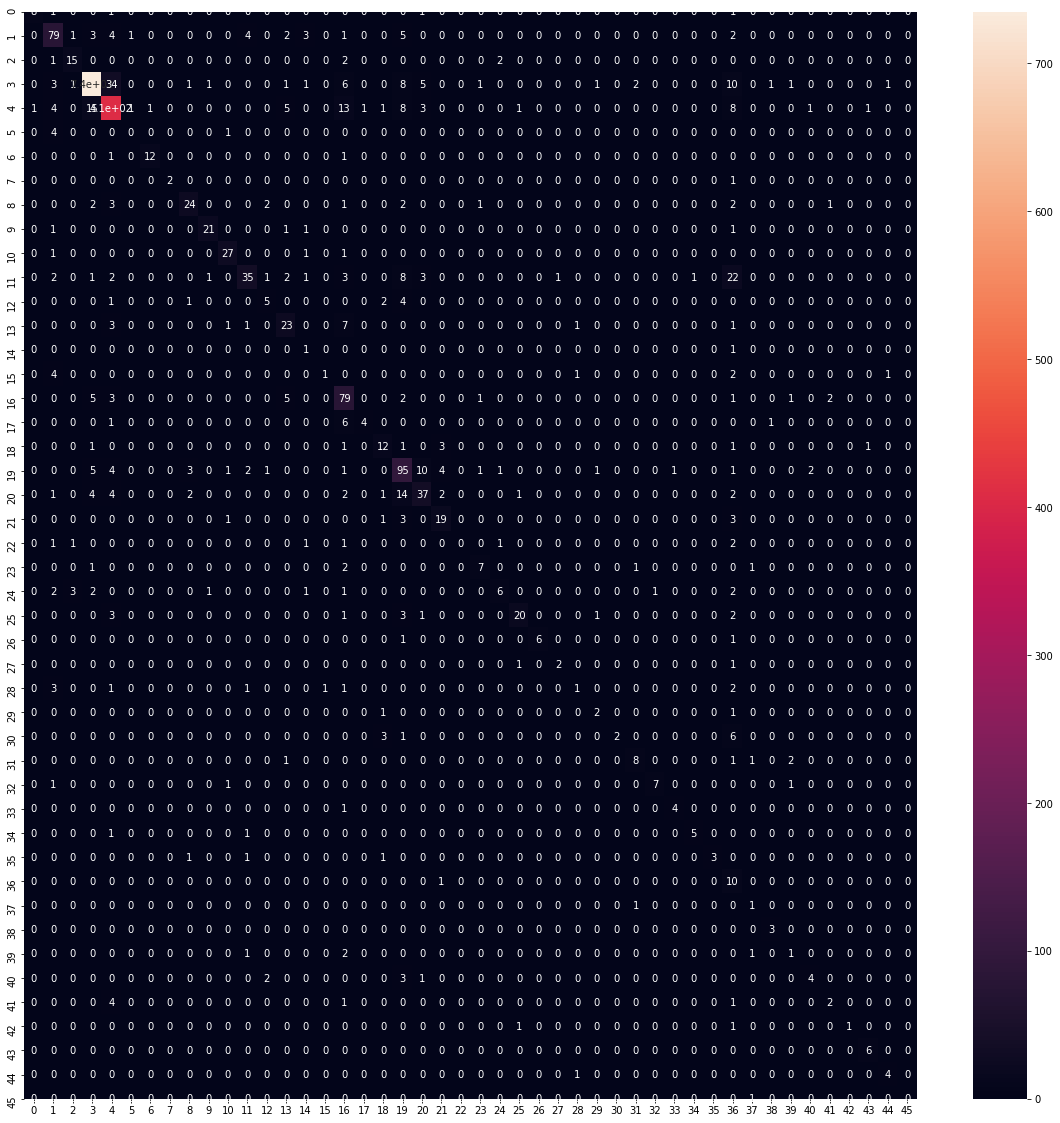

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.73      0.75      0.74       105
           2       0.71      0.75      0.73        20
           3       0.95      0.90      0.93       813
           4       0.85      0.86      0.86       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.75      0.63      0.69        38
           9       0.88      0.84      0.86        25
          10       0.84      0.90      0.87        30
          11       0.76      0.42      0.54        83
          12       0.45      0.38      0.42        13
          13       0.57      0.62      0.60        37
          14       0.10      0.50      0.17         2
          15       0.50      0.11      0.18         9
          16       0.59      0.80      0.68        99
          17       0.80    

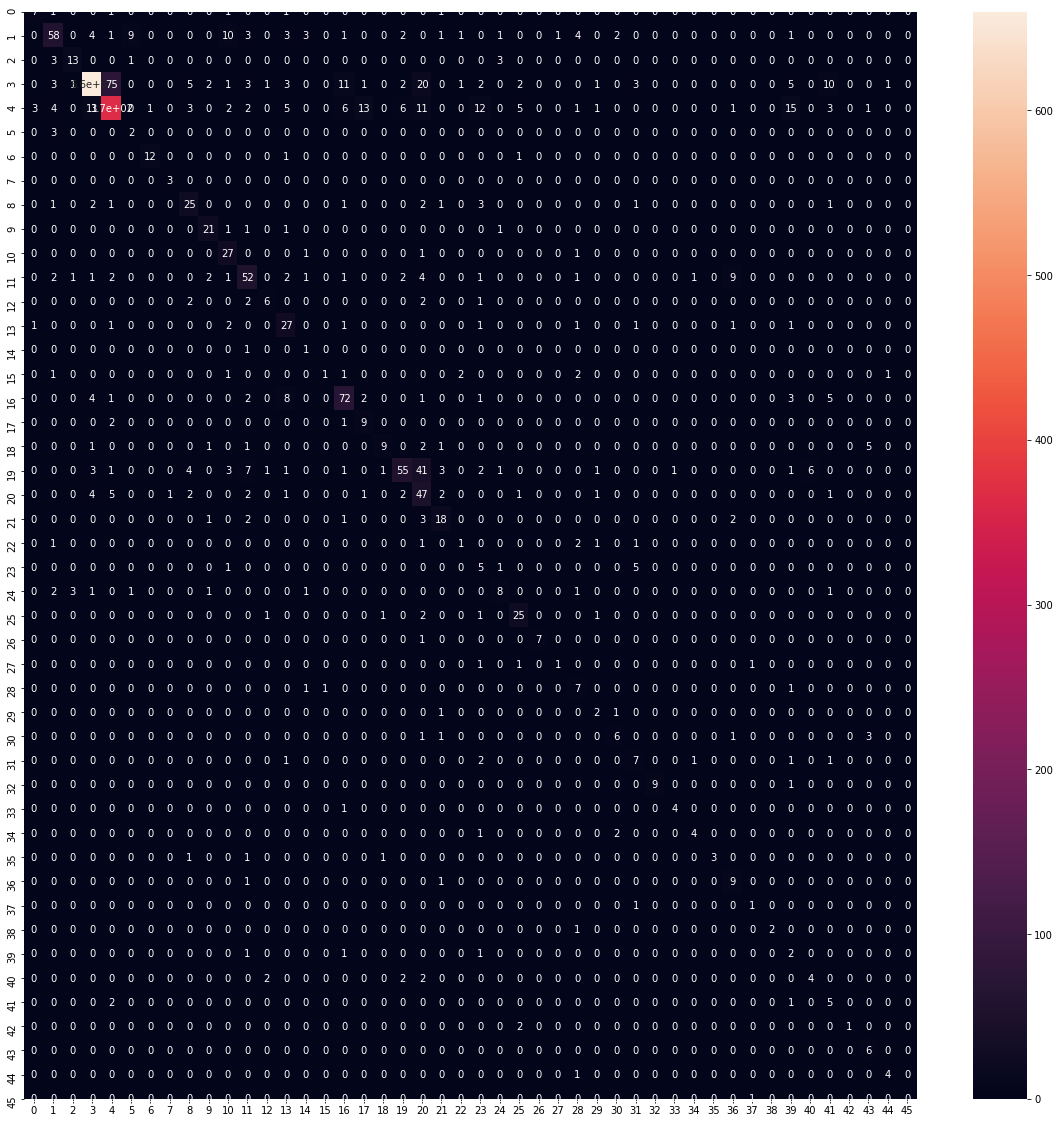

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.73      0.55      0.63       105
           2       0.72      0.65      0.68        20
           3       0.96      0.81      0.88       813
           4       0.80      0.78      0.79       474
           5       0.15      0.40      0.22         5
           6       0.92      0.86      0.89        14
           7       0.75      1.00      0.86         3
           8       0.60      0.66      0.62        38
           9       0.75      0.84      0.79        25
          10       0.54      0.90      0.68        30
          11       0.64      0.63      0.63        83
          12       0.55      0.46      0.50        13
          13       0.50      0.73      0.59        37
          14       0.12      0.50      0.20         2
          15       0.50      0.11      0.18         9
          16       0.73      0.73      0.73        99
          17       0.35    

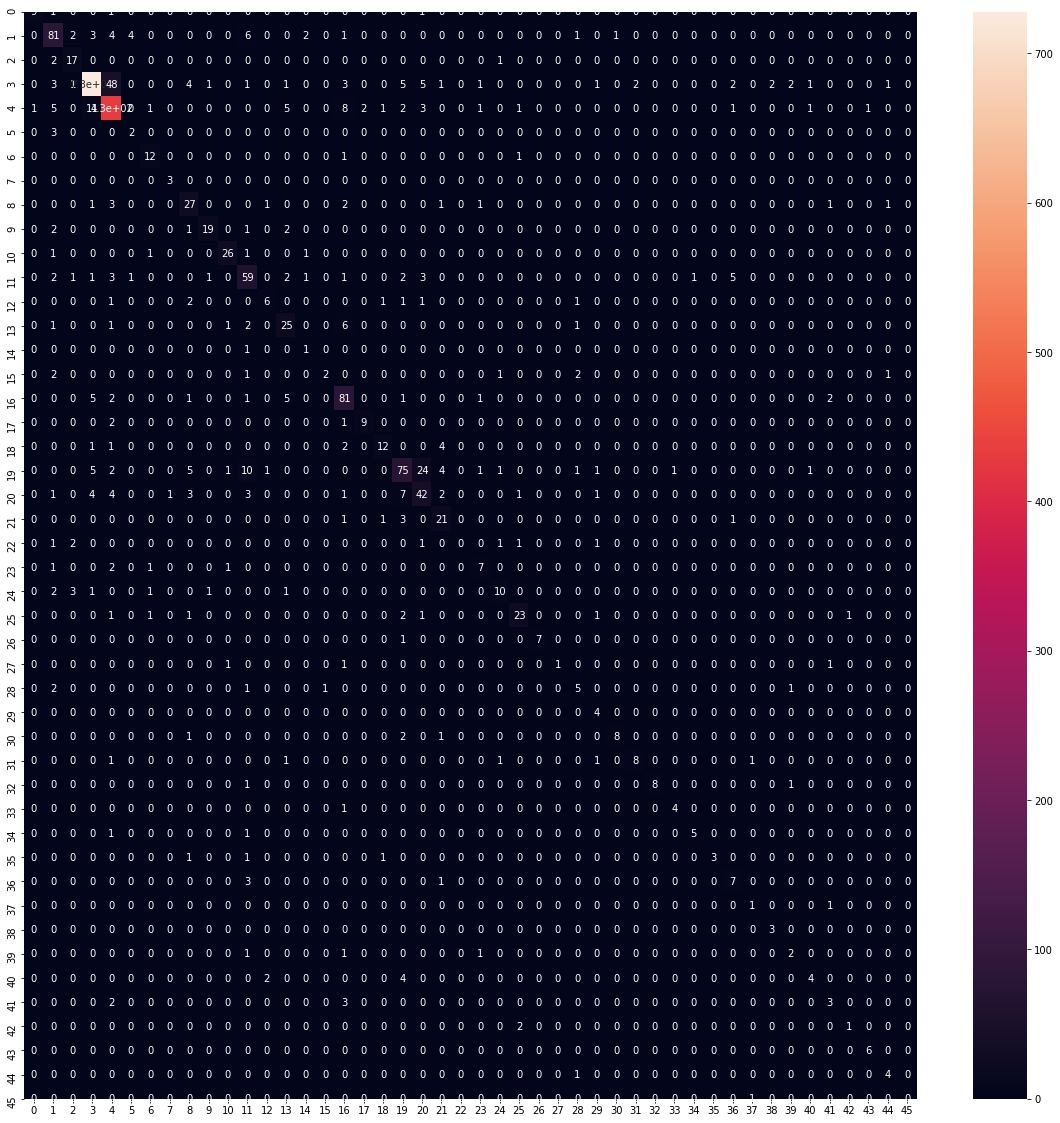

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.74      0.77      0.75       105
           2       0.65      0.85      0.74        20
           3       0.96      0.90      0.93       813
           4       0.84      0.91      0.87       474
           5       0.29      0.40      0.33         5
           6       0.71      0.86      0.77        14
           7       0.75      1.00      0.86         3
           8       0.59      0.71      0.64        38
           9       0.86      0.76      0.81        25
          10       0.87      0.87      0.87        30
          11       0.63      0.71      0.67        83
          12       0.60      0.46      0.52        13
          13       0.60      0.68      0.63        37
          14       0.20      0.50      0.29         2
          15       0.67      0.22      0.33         9
          16       0.71      0.82      0.76        99
          17       0.82    

In [23]:
for i, model in enumerate(models):
    print(f"Evaluating model {i}")
    evaluate_test(model)

## Wnioski

1. 1 ukryta warstwa - nieznaczna poprawa precision - prawdopodobnie spowodowana mniejszą liczbą współczynników w procesie uczenia
2. 3 ukryte warstwy - pogorszenie jakości klasyfikacji - prawdopodobnie spowodowane zbyt dużą liczbą współczynników, przy stosunkowo niewielkiej ilości danych
3. Mniejsza liczba elementów w warstwach - pogorszenie jakości klasyfikacji - prawdopodobnie niedostateczna liczba neuronów w stosunku do rozmiaru danych
4. Większa liczba elementów w warstwach - nieznaczne pogorszenie jakości klasyfikacji - prawdopodobnie spowodowane zbyt dużą liczbą współczynników, przy stosunkowo niewielkiej ilości danych
5. Inna funkcja strarty (binary crossentropy) - znaczne pogorszenie jakości klasyfikacji - nie jest to odpowiednia funkcja straty do tego problemu
6. Aktywacja tanh - podobna jakość klasyfikacji